# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


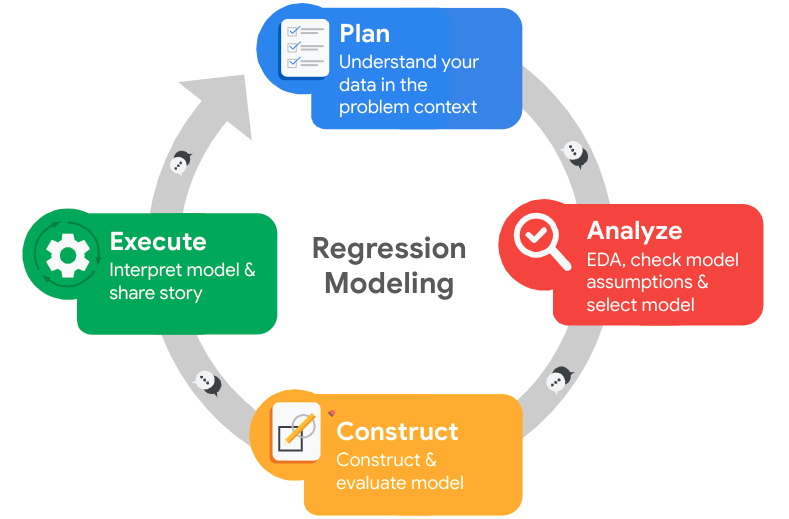

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




My stakeholders are the members of the HR team, and if appropriate, the managers or team leaders.

I am trying to help the team understand what factor or factors might cause an employee to leave the company. They will use these insights to drive increased employee satisfaction and retention.

I am seeing most variables I would expect in tracking employee satisfaction and retention. In the future, I might also wish to see vacation time allocated and used, and whether the employee worked overtime.

I am using the data provided at this stage, as further data gathering is not going to be possible. I am leaning toward using a machine learning model to answer the business question, but will leave this subject to change upon exploring the dataset.

I would have liked to seen some demographic data such as gender, race, and age, as while these variables may open up opportunities for bias, it is also difficult to track down cases of discrimination, which can certainly be a factor in employee retention and satisfaction.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [86]:
# Import packages
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
import sklearn.metrics as metrics

# For saving models
import pickle 

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe()


satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [16]:
# Rename columns as needed
df0 = df0.rename(columns={"average_montly_hours" : "average_monthly_hours",
                         "Work_accident" : "work_accident",
                         "time_spend_company" : "tenure",
                         "Department" : "department"})


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [18]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [22]:
# Check for duplicates
df0.duplicated().sum()


3008

In [24]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()


satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

In [26]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep="first")


# Display first few rows of new dataframe as needed
df1.head()


satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

### Check outliers

Check for outliers in the data.

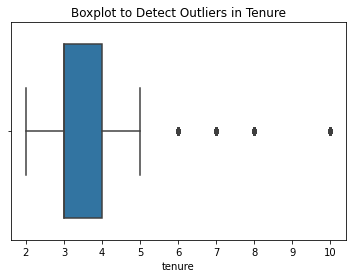

In [28]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.title("Boxplot to Detect Outliers in Tenure")
sns.boxplot(df1["tenure"])



In [34]:
# Determine the number of rows containing outliers
percentile25 = df1["tenure"].quantile(.25)
percentile75 = df1["tenure"].quantile(.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit", upper_limit)
print("Lower limit", lower_limit)
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]
print("Number of rows containing outliers in the variable `tenure`:", len(outliers))


Upper limit 5.5
Lower limit 1.5
Number of rows containing outliers in the variable `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

The data came through relatively clean. I just needed to drop some duplicates, which unfortunately represented 20% of my dataset. There were no missing values. Some column names included typos, were not in uniform snake case, or were needlessly wordy. These columns were renamed more appropriately. Lastly, a check for outliers on the 'tenure' column showed there were 824 outliers in this column. This may be useful later on.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [40]:
# Get numbers of people who left vs. stayed
print(df1["left"].value_counts())

# Get percentages of people who left vs. stayed
print(df1["left"].value_counts(normalize="True"))


0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

<Figure size 1152x648 with 0 Axes>

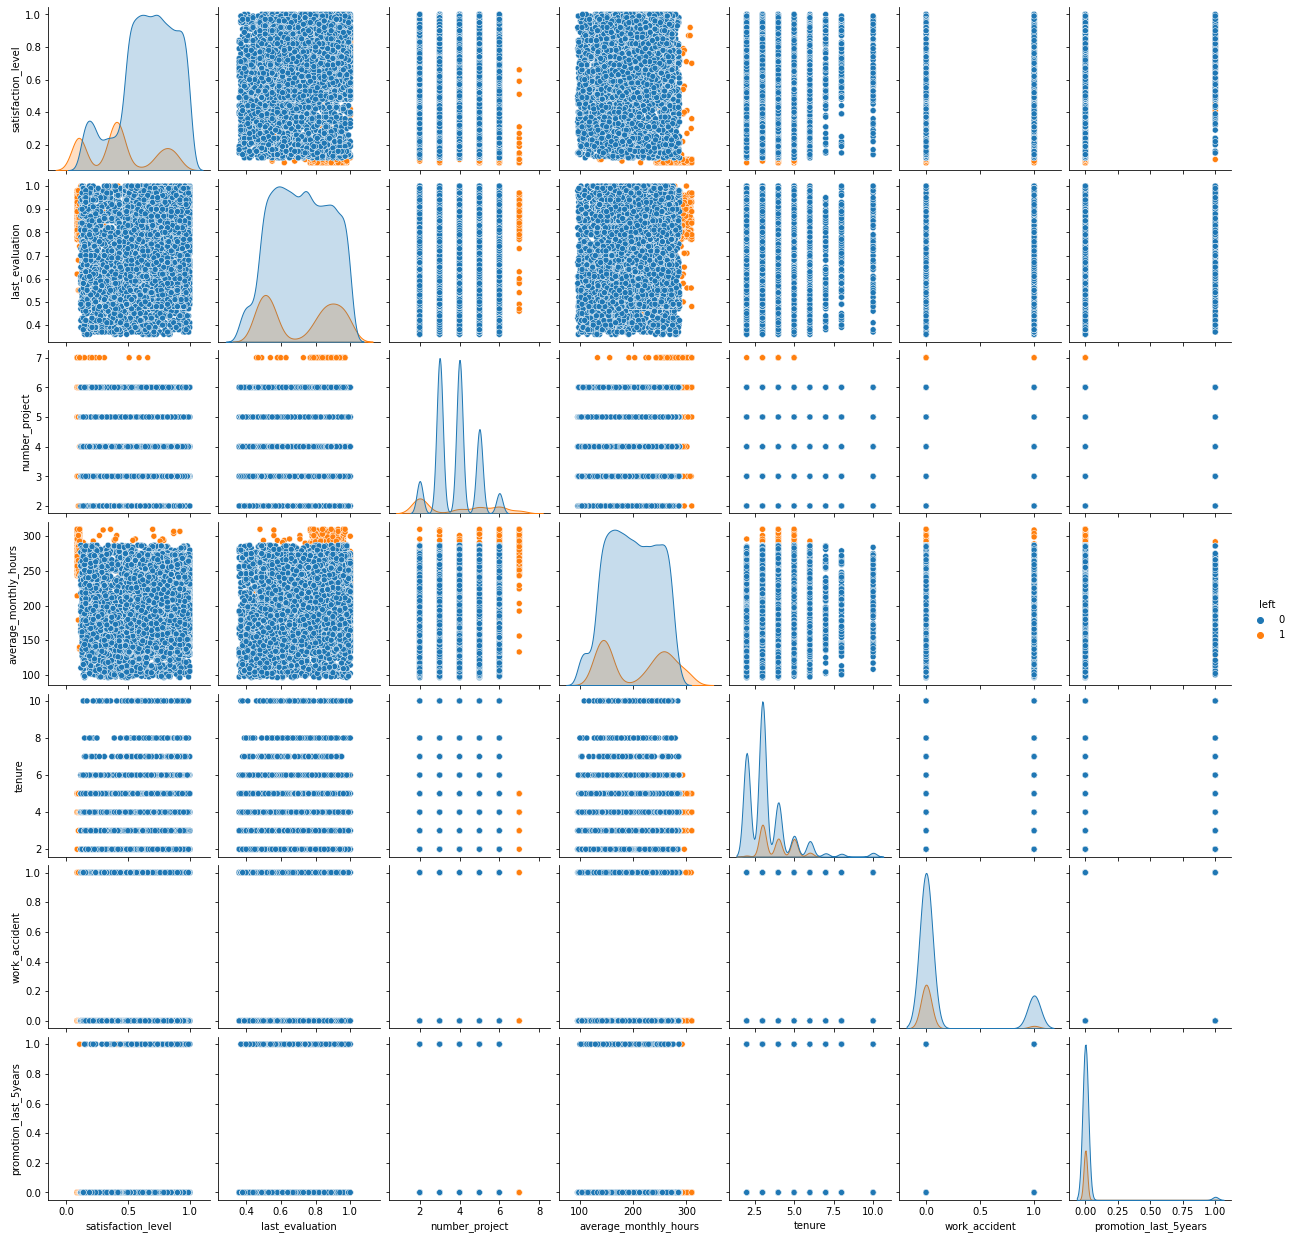

In [48]:
# Create a plot as needed
plt.figure(figsize=(16, 9))
sns.pairplot(df1, hue="left")
plt.show()

I started with a pairplot, hoping to find some potential relationships to examine more closely. The matrix is a little difficult to read, however, there are a few that I see right off that merit additional digging. There is the relationship between number of projects and number of hours worked per month, I see clusters forming at the extreme values of both of these. Further, there are large clusters of employees who left in the comparisons between hours worked and satisfaction and evaluation levels. I will examine the relationship between the evaluation and satisfaction level, as these are likely to be connected in some way. 

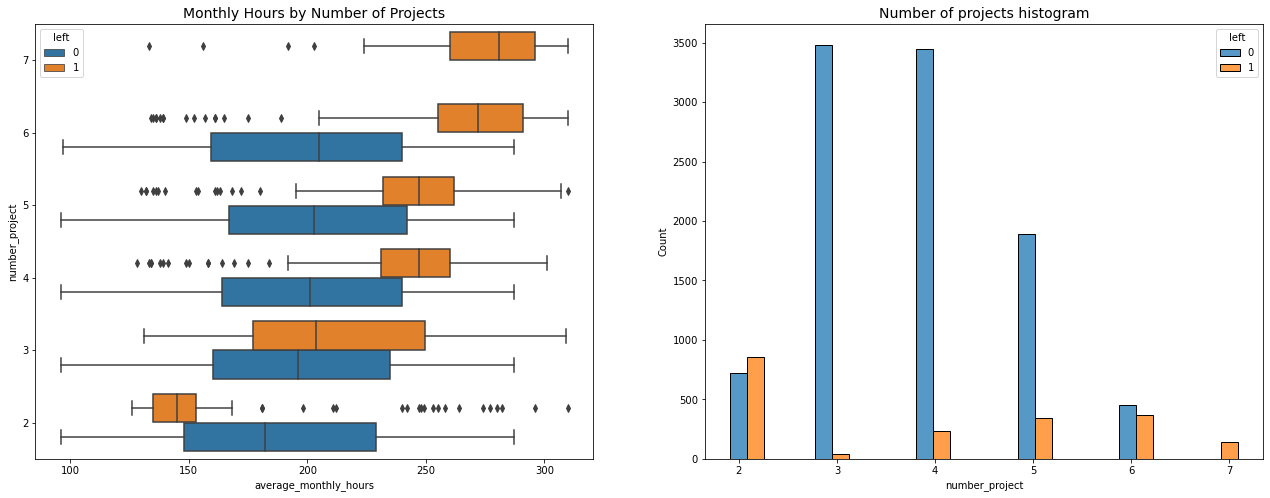

In [50]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.boxplot(data=df1, x="average_monthly_hours", y="number_project", hue="left", orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Monthly Hours by Number of Projects", fontsize="14")

tenure_stay = df1[df1["left"]==0]["number_project"]
tenure_left = df1[df1["left"]==1]["number_project"]
sns.histplot(data=df1, x="number_project", hue="left", multiple="dodge", shrink=2, ax=ax[1])
ax[1].set_title("Number of projects histogram", fontsize="14")

plt.show()

Both plots show that as the number of projects increased, the average number of hours worked also increased. This might be expected, as the amount of work on one's plate would correlate to working longer hours. It does, however, also seem to correlate to a decrease in employee retention. Every employee with seven projects left the company. Almost as many with six left as stayed.

The sweet spot seems to be 3 to 4 projects. The median of the employees who worked 4 projects and also left is greater than the interquartile range of those who stayed while working the same number of projects. It's possible that time management is a factor, those whose hours spiraled toward the high end tended to leave in the 4 and 5 project groups.

It is also notable that, if we assume a work week of 40 hours * 50 weeks out of a year / 12 months = 166.67 hours per month, the majority of employees at this company are overworked. Other than the 2 project group, the vast majority of those who left worked longer hours than the standard 40 hour work week. This is likely a contributing factor to a reduction in satisfaction and an increase in employees leaving the company.

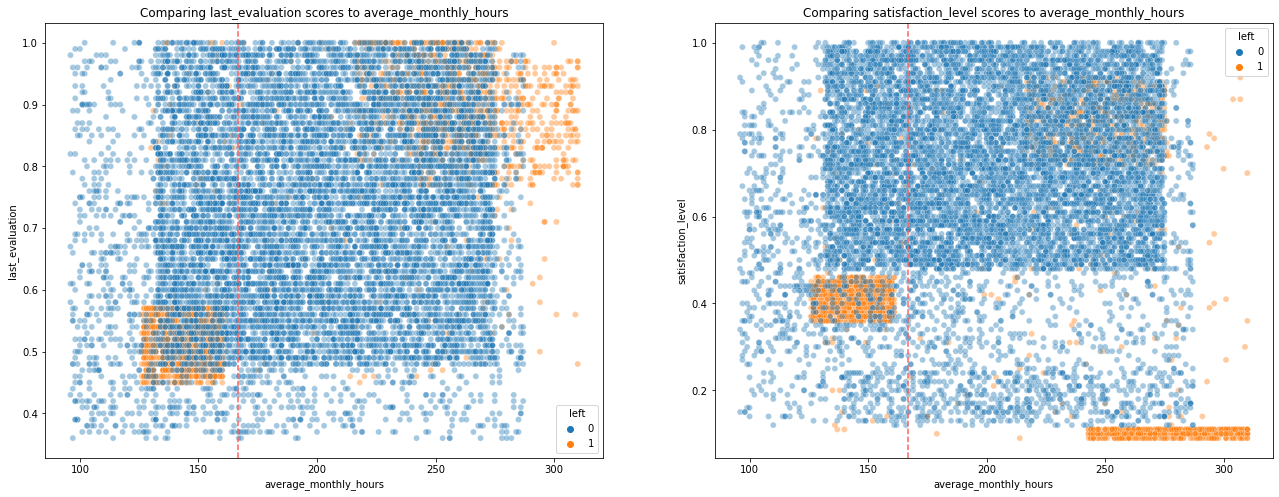

In [63]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.scatterplot(data=df1, y="last_evaluation", x="average_monthly_hours", hue="left", alpha=0.4, ax=ax[0])
ax[0].set_title("Comparing last_evaluation scores to average_monthly_hours")
ax[0].axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')

sns.scatterplot(data=df1, y="satisfaction_level", x="average_monthly_hours", hue="left", alpha=0.4, ax=ax[1])
ax[1].set_title("Comparing satisfaction_level scores to average_monthly_hours")
ax[1].axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.show()

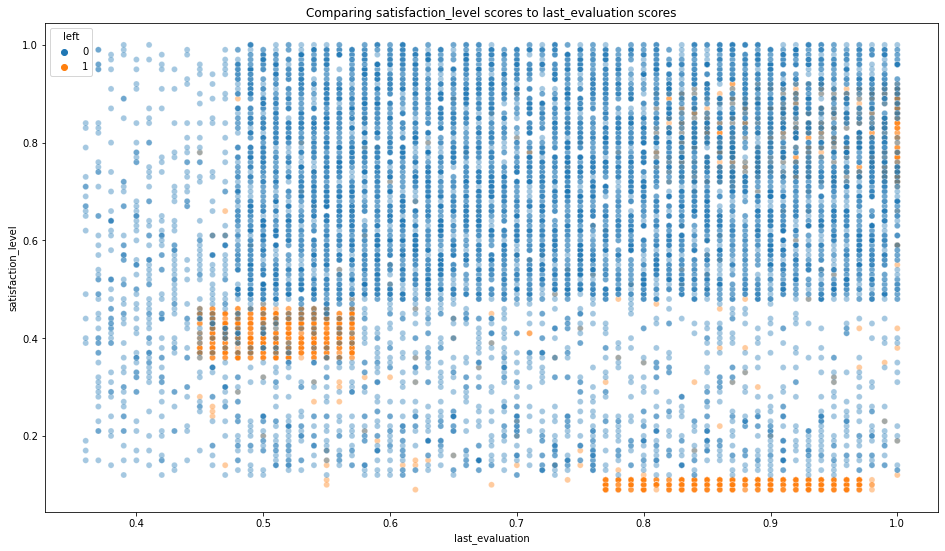

In [62]:
# Create a plot as needed
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1, y="satisfaction_level", x="last_evaluation", hue="left", alpha=0.4)
plt.title("Comparing satisfaction_level scores to last_evaluation scores")
plt.show()

These three plots show three main clusters of employees leaving. It is clear that there is a connection between long hours and low satisfaction. There is a cluster with relatively low monthly hours worked, low evaluations, and low satisfaction. It is possible that a large number of employees in this group are fired for low performance or are not given enough projects to remain engaged with their work or teams.

The group with very long working hours, some above 300 per month on average, did receive higher evaluations. This might also be expected, as in many cases, working more leads to getting more done. Unfortunately, this same block of employees reports extremely low job satisfaction.

There is also a group with relatively high working hours and job satisfaction. It's difficult to speculate why these employees might have left, it could be that they were highly productive but felt pressured to work longer hours by their peers, or that their skills and efficacy led them to seek out new opportunities. 

I would like to see if there is any connection between these groups and their departments.

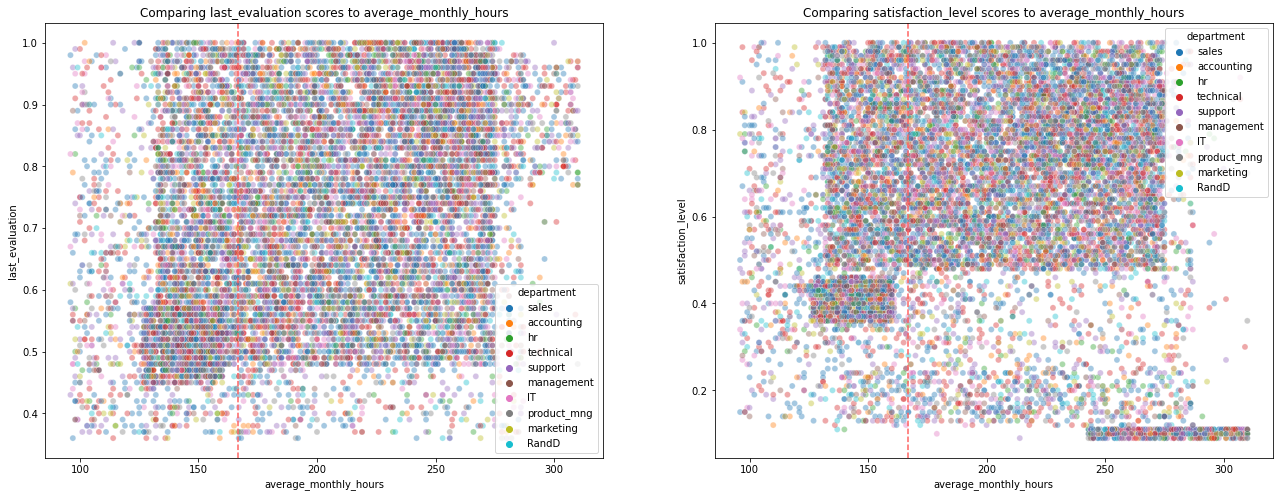

In [64]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.scatterplot(data=df1, y="last_evaluation", x="average_monthly_hours", hue="department", alpha=0.4, ax=ax[0])
ax[0].set_title("Comparing last_evaluation scores to average_monthly_hours")
ax[0].axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')

sns.scatterplot(data=df1, y="satisfaction_level", x="average_monthly_hours", hue="department", alpha=0.4, ax=ax[1])
ax[1].set_title("Comparing satisfaction_level scores to average_monthly_hours")
ax[1].axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.show()

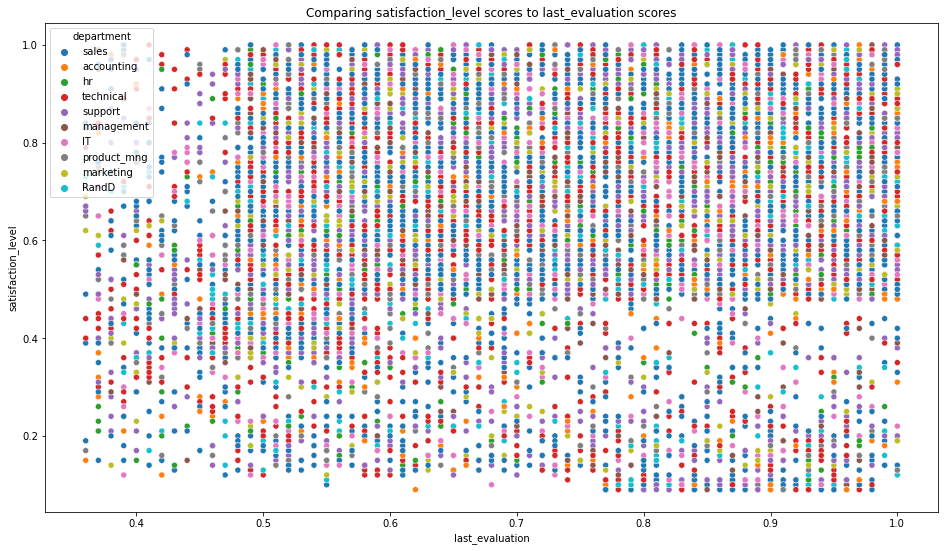

In [61]:
# Create a plot as needed
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1, y="satisfaction_level", x="last_evaluation", hue="department")
plt.title("Comparing satisfaction_level scores to last_evaluation scores")
plt.show()


There don't seem to be any significant relationships between the main clusters of employees leaving and their department.

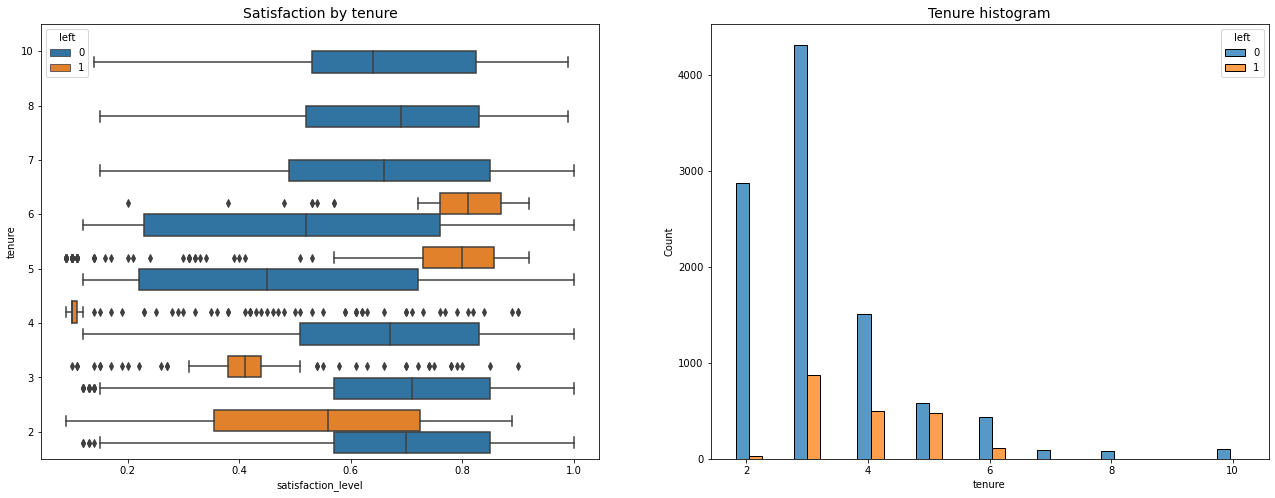

In [66]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();


There are a few insights to be gleaned from looking at the relationship between tenure and satisfaction. There are two main groups of employees that left the company: those with relatively short tenure of 2-3 years and below average satisfaction, and those of moderate tenure of 5-6 years with relatively high satisfaction. Four year employees have unusually low satisfaction. There might have been changes to company policy or other factors contributing to this and bears investigating.

No one who stayed with the company longer than 6 years left the company. However, there are not very many longer-tenured employees.



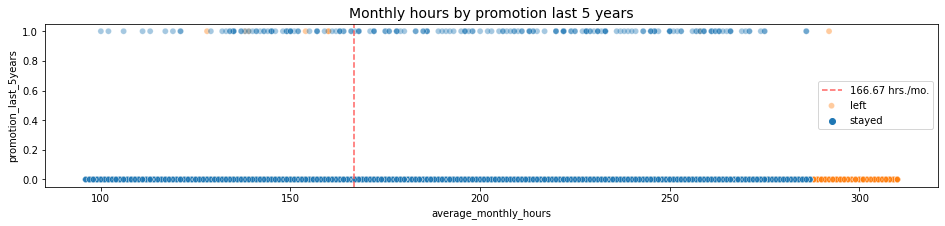

In [67]:
# Create a plot as needed
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');


A large majority of employees have not been promoted in the last 5 years. Of those, all of those who left worked the longest hours. Very few employees who received a promotion in the last 5 years left the company. There also seems to be a drop off in total average hours worked after the promotions, which may lead to higher satisfaction.

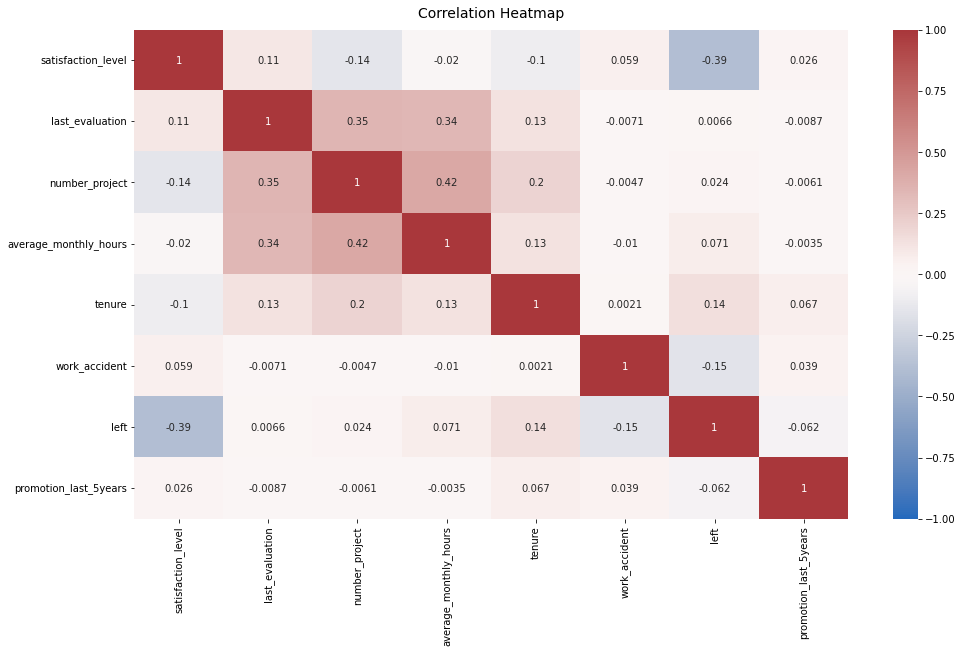

In [65]:
# Create a plot as needed
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);


### Insights

As might be expected, there is a strong correlation between low satisfaction and employees leaving. There are also close connections between the number of projects, number of hours, and last evaluation scores. These factors point to overworked and burnt out employees. There may be problems with management or overall work culture, as work-life balance is being severely impacted and reducing satisfaction, therefore retention.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The prediction being made is a binomial categorical outcome variable. The task is to predict whether an employee will leave the company, which can be split into 1 (employee left) or 0 (employee did not leave). 

### Identify the types of models most appropriate for this task.

Since the variable of employee leaving is categorical, I will use a Tree-based Machine Learning model. Binomial logistic regression is another possible option, however, since it can be sensitive to outliers, I chose to use a tree-based model since my boxplots showed many outliers and some of the values are extreme.

### Modeling

Below are the steps I have taken to implement a Decision Tree and Random Forest in order to model the question of whether an employee will leave the company or not.

In [78]:
# Create a copy of the dataframe
df_enc = df1.copy()

# Encode non-numerical variables
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

df_enc = pd.get_dummies(df_enc, drop_first=False)

# Isolate the outcome variable
y = df_enc["left"]


In [79]:
# Select features
X = df_enc.drop("left", axis=1)

In [80]:
# Split the data into training and test partitions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [81]:
# Instatiate the model with a cross-validated gridsearch to find best parameters
tree = DecisionTreeClassifier(random_state=0)
cv_params = {"max_depth" :[4, 6, 8, None],
            "min_samples_leaf":[2, 5, 1],
            "min_samples_split":[2, 4, 6]}
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [89]:
%%time
# Fit the model to the training data
tree1.fit(X_train, y_train)
dt_pred = tree1.predict(X_test)

CPU times: user 3 s, sys: 3.22 ms, total: 3.01 s
Wall time: 3.01 s


In [90]:
# Print the best parameters and AUC score
print(tree1.best_params_)
print(tree1.best_score_)

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.969819392792457


This is a great AUC score, which shows the model is very effective at predicting employees who will leave.


In [95]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))
print("AUC:", "%.6f" % metrics.roc_auc_score(y_test, dt_pred))

Decision Tree
Accuracy: 0.975317
Precision: 0.936214
Recall: 0.913655
F1 Score: 0.924797
AUC: 0.950627


Since decision trees can be prone to overfitting to the training data, it would be best to move forward with a random forest model to incorporate multiple trees. This may result in lower scoring test data but a better and more stable model for real world usage.

In [96]:
# Intantiate the Random Forest model
rf = RandomForestClassifier(random_state=0)
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             } 
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [97]:
%%time
# Fit the random forest model to the training data
rf1.fit(X_train, y_train)

CPU times: user 9min 56s, sys: 1.28 s, total: 9min 57s
Wall time: 9min 58s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [102]:
# Pickle the model to reduce computing time
path = '/home/jovyan/work/'
def write_pickle(path, model_object, save_as:str):
        with open(path + save_as + '.pickle', 'wb') as to_write:
            pickle.dump(model_object, to_write)
        
def read_pickle(path, saved_model_name:str):
        with open(path + saved_model_name + '.pickle', 'rb') as to_read:
            model = pickle.load(to_read)

        return model

write_pickle(path, rf1, 'hr_rf1')
rf1 = read_pickle(path, 'hr_rf1')

In [104]:
# Find the best parameters and AUC score for the random forest model
print(rf1.best_params_)
print(rf1.best_score_)

{'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 500}
0.9804250949807172


In [106]:
rf_pred = rf1.predict(X_test)
print("Random Forest")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, rf_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, rf_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, rf_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, rf_pred))
print("AUC:", "%.6f" % metrics.roc_auc_score(y_test, rf_pred))

Random Forest
Accuracy: 0.980987
Precision: 0.964211
Recall: 0.919679
F1 Score: 0.941418
AUC: 0.956439


These scores are even stronger than before! This indicates that the random forest model does outperform the decision tree model. 

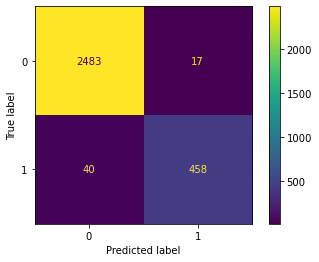

In [108]:
preds = rf1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf1.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf1.classes_)
disp.plot(values_format="");

This model predicts more false negatives than false positives, which means that some employees may be identified as low risk of quitting or being fired, when in fact they are. Still, it is a very strong model.

In [109]:
rf1_importances = pd.DataFrame(rf1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
rf1_importances = rf1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
rf1_importances = rf1_importances[rf1_importances['gini_importance'] != 0]
rf1_importances

gini_importance
satisfaction_level             0.493518
number_project                 0.164313
last_evaluation                0.146839
tenure                         0.116408
average_monthly_hours          0.077554
department_RandD               0.000244
salary                         0.000209
department_technical           0.000181
department_IT                  0.000152
department_marketing           0.000151
department_support             0.000125
department_hr                  0.000122
department_accounting          0.000095
department_sales               0.000053
work_accident                  0.000013
department_product_mng         0.000010
department_management          0.000010
promotion_last_5years          0.000002

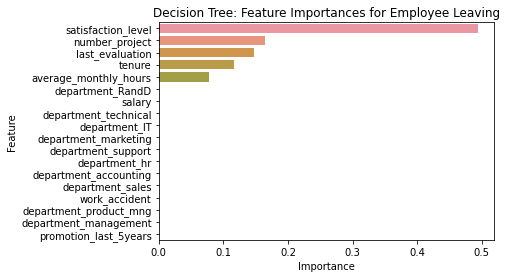

In [112]:
sns.barplot(data=rf1_importances, x="gini_importance", y=rf1_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Employee satisfaction is the clear driver in determining whether an employee stays or leaves. I have previously shown how there are very strong correlations between satisfaction and hours worked, projects assigned, and evaluation scores.

I would recommend examining the cause of the employees being so overworked. Are teams understaffed? Are managers creating a culture that incentivizes excessive working hours? Since there is such a strong correlation between an increase in number of projects and number of hours, leading to an increase in employees leaving, is it possible to assign more new or existing staff to those projects, so that the average number of projects per person can hover in the ideal range of 3-5, while simultaneously reducing the hours worked? That could be a great potential solution.

Since satisfaction level is such a strong indicator, it might be possible to improve the model by dissecting that attribute further. After all, this metric is employee-evaluated. It is possible, even likely, that employees tend to self-report in extreme ways. An example could be an employee who has already decided to quit ranking their satisfaction low, or one who is at risk of being fired ranking high in hopes of keeping their job.

I would certainly suggest the team examine staffing and how projects are assigned. The employees do respond positively when given enough to work on, but not too much. They may benefit from other methods for increasing satisfaction, such as cross-training, inter-departmental projects, or being told what part their projects play in the bigger picture for the company.

While this model has performed very well, I would reiterate my concerns about the lack of demographic data. While I would not want to recommend action based on demographics alone, it could be useful to see if certain groups are disproportionately affected by the company culture, and explore the reasons why.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The Random Forest model performed very well, with an accuracy score of 98.1%, precision score of 96.4%, recall score of 92.0%, F1 score of 94.1%, and AUC score of 95.6%. The decision tree model was slightly worse than this, so it was worth taking the extra steps to build the second model. The model was slightly more likely to predict false negatives than false positives, which means that some employees may be identified as low risk of quitting or being fired, when in fact they are. Still, it is a very strong model.

### Conclusion, Recommendations, Next Steps

In conclusion, it would be prudent for HR to examine the root causes of employees working such long hours at Salifort. This is proving to be a sticking point in low satisfaction and retention.

* They could limit or generally reduce the number of projects employees can work on at one time. Early in the discovery, we learned that 3-5 projects was the "sweet spot" for job satisfaction.

* Consider a change to the hierarchy so that employees of lower tenure can be promoted sooner, as this led to an increase in retention.

* Either provide significant incentive to work longer hours, or do not require employees to do so.

* Consider reviewing staffing to determine if the company is understaffed, and grow teams proportional to their workload. This allows the projects to be completed faster and by fewer individual hours. It could even have a multiplicative result where through the increase in collaboration, more projects are able to get done in the same amount of time.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.